# Assignment 3: SVM to classify handwritten digits
(In addition, Logistic Regression model is implemented.)

## 1. Import libraries & dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

In [2]:
digits = datasets.load_digits()

## 2. Exploratory data analysis & data preprocessing

Flatten the images (because SVMs in scikit-learn expect 1D arrays as input).

In [3]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

Split data into training and testing set.

In [4]:
X=data
y=digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Reduce the number of features to 2 using PCA.

In [5]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

## 3. Build & train the SVM model

Define a function to perform grid search for SVM hyperparameters

In [6]:
def svm_grid_search(kernel, param_grid):
    svc = SVC(kernel=kernel)
    grid_search = GridSearchCV(svc, param_grid, cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    return grid_search

Define hyperparameter grids for different kernels

In [7]:
param_grid_linear = {'C': [0.1, 1, 10, 100]}
param_grid_rbf = {'C': [0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1, 10]}
param_grid_poly = {'C': [0.1, 1, 10, 100], 'degree': [2, 3, 4], 'coef0': [0, 1, 2]}

Perform grid search tp find the best hyperparameter settings (including kernel parameters and the regularization parameter) for each of the kernel types.

In [8]:
linear_svm = svm_grid_search('linear', param_grid_linear)
rbf_svm = svm_grid_search('rbf', param_grid_rbf)
poly_svm = svm_grid_search('poly', param_grid_poly)

print("Linear SVM - Best Hyperparameters:", linear_svm.best_params_)
print("RBF SVM - Best Hyperparameters:", rbf_svm.best_params_)
print("Poly SVM - Best Hyperparameters:", poly_svm.best_params_)


Linear SVM - Best Hyperparameters: {'C': 0.1}
RBF SVM - Best Hyperparameters: {'C': 10, 'gamma': 0.01}
Poly SVM - Best Hyperparameters: {'C': 10, 'coef0': 0, 'degree': 3}


## 4. Build and train Logistic Regression model

Define hyperparameter grids for logistic regression.

In [9]:
param_grid_logreg = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

Perform grid search for logistic regression to find best hyperparameters.

In [10]:
logreg = LogisticRegression(max_iter=1000)
grid_search_logreg = GridSearchCV(logreg, param_grid_logreg, cv=5, n_jobs=-1)
grid_search_logreg.fit(X_train, y_train)
print("Logistic Regression - Best Hyperparameters:", grid_search_logreg.best_params_)

Logistic Regression - Best Hyperparameters: {'C': 0.01}


c:\Users\Jinny\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 5. Prediction

Make predictions on the test set using the best hyperparameter.

In [11]:
y_pred_linear = linear_svm.predict(X_test)
y_pred_rbf = rbf_svm.predict(X_test)
y_pred_poly = poly_svm.predict(X_test)
y_pred_logreg = grid_search_logreg.predict(X_test)

Calculate accuracy for each model & kernel.

In [12]:
accuracy_linear = accuracy_score(y_test, y_pred_linear)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
accuracy_poly = accuracy_score(y_test, y_pred_poly)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)

print("Linear SVM Accuracy:", accuracy_linear)
print("RBF SVM Accuracy:", accuracy_rbf)
print("Poly SVM Accuracy:", accuracy_poly)
print("Logistic Regression Accuracy:", accuracy_logreg)


Linear SVM Accuracy: 0.9777777777777777
RBF SVM Accuracy: 0.8138888888888889
Poly SVM Accuracy: 0.9861111111111112
Logistic Regression Accuracy: 0.975


Create a bar plot to compare accuarcy of the models.

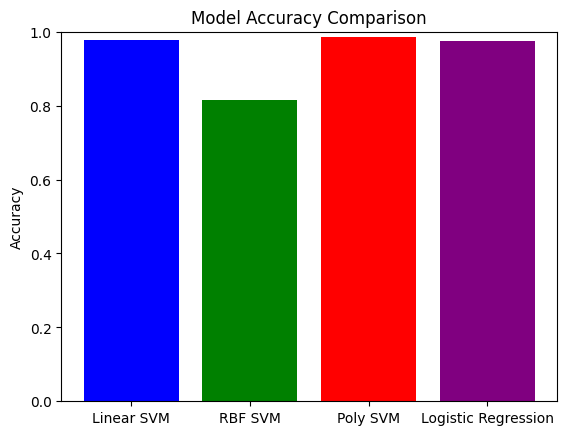

In [13]:
models = ['Linear SVM', 'RBF SVM', 'Poly SVM', 'Logistic Regression']
accuracies = [accuracy_linear, accuracy_rbf, accuracy_poly, accuracy_logreg]

plt.bar(models, accuracies, color=['blue', 'green', 'red', 'purple'])
plt.ylim(0, 1)  # Set y-axis limits to 0-1 for accuracy percentage
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.show()